In [34]:
%cd ~/fur/
import math
import numpy as np
import scipy.signal
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
import fur.finding_period as fp
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
#shift_03_10_2020.show_waveform_file_names()
waveforms_dir = shift_03_10_2020.get_waveforms_dir()

/home/ilobach/fur


In [35]:
test_file = shift_03_10_2020.get_waveform_path('RefCurve_2020-03-10_1_113153.Wfm.bin')
ch1, ch2 = read_waveform(test_file)

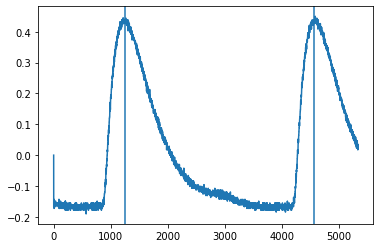

In [36]:
ch = ch2[:2665*2]
plt.plot(ch)
plt.axvline(1250)
plt.axvline(1250+3300)


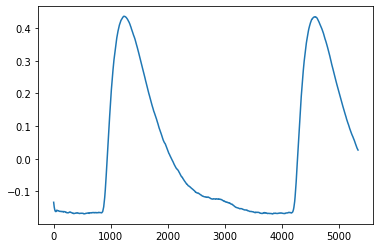

In [21]:
filtered = fp.get_fitlered_signal(ch)
plt.plot(filtered)

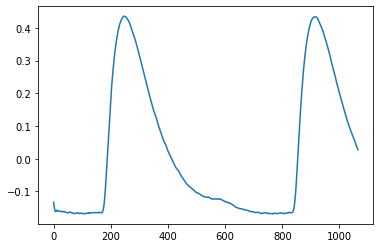

In [22]:
resampling_factor = 5
dt0 = 0.04  # ns
dt = resampling_factor*dt0
reduced_ch = fp.get_reduced_data(filtered,resampling_factor)
plt.plot(reduced_ch)

In [23]:
absolute_trig_level = fp.get_absolute_trig_level_from_relative(reduced_ch)
absolute_trig_level

0.13334819674491882

In [24]:
trig_times = fp.get_trig_times(reduced_ch, absolute_trig_level)

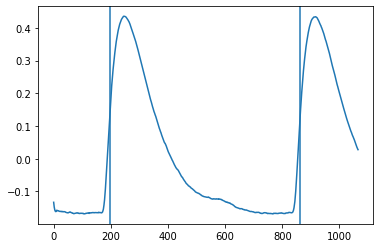

In [25]:
plt.plot(reduced_ch)
for t in trig_times:
    plt.axvline(t)

In [26]:
period = fp.get_period_from_trig_times(trig_times)
period

666.4831361919639

In [27]:
real_period = dt0*resampling_factor*period
real_period # ns

133.2966272383928

In [37]:
fp.get_period(ch)

3332.41568095982

Checking periods in different chunks of the waveform

In [31]:
for start in np.arange(0,1,0.1):
    end = start+0.1
    print(fp.get_period(ch2[int(start*len(ch2)):int(end*len(ch2))], sampling_time=dt0))

133.29791298046962
133.29792270653257
133.2979311347681
133.29793294055253
133.29792182151837
133.29792373355056
133.29791650463105
133.2979264986261
133.29792476764027
133.29792360796137
